<a href="https://colab.research.google.com/github/palash-21/Speech-Emotion-Recognition/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Speech Emotion Recognition:

Speech Emotion Recognition, abbreviated as SER, is the act of attempting to recognize human emotion and affective states from speech. This is capitalizing on the fact that voice often reflects underlying emotion through tone and pitch.

Scope of this project:
1) I will collect a variety of public datasets of speech recordings.
2) Extract acoustic features from speech.
3) Experiment with different Neural Networks to learn emotion behing the speech.
4) Lastly deploy the best model using Azure web apps service. 

# Datasets used here

We are using the following 11 datasets for our task:
1. CREMA-D

CREMA-D audio dataset for our task.
CREMA-D is a data set of 7,442 original clips from 91 actors. These clips were from 48 male and 43 female actors between the ages of 20 and 74 coming from a variety of races and ethnicities (African America, Asian, Caucasian, Hispanic, and Unspecified). 

Actors spoke from a selection of 12 sentences. The sentences were presented using one of six different emotions (Anger, Disgust, Fear, Happy, Neutral, and Sad) and four different emotion levels (Low, Medium, High, and Unspecified). 



2. TESS

TESS (Toronto Emotional Speech Set): 2 female speakers (young and old), 2800 audio files, random words were spoken in 7 different emotions.

These stimuli were modeled on the Northwestern University Auditory Test No. 6 (NU-6; Tillman & Carhart, 1966). A set of 200 target words were spoken in the carrier phrase "Say the word _____' by two actresses (aged 26 and 64 years) and recordings were made of the set portraying each of seven emotions (anger, disgust, fear, happiness, pleasant surprise, sadness, and neutral). There are 2800 stimuli in total.

3. SAVEE

(Surrey Audio-Visual Expressed Emotion): 4 male speakers, 480 audio files, same sentences were spoken in 7 different emotions.
Speakers-
'DC', 'JE', 'JK' and 'KL' are four male speakers recorded for the SAVEE database

Audio files consist of audio WAV files sampled at 44.1 kHz

There are 15 sentences for each of the 7 emotion categories.
The initial letter(s) of the file name represents the emotion class, and the following digits represent the sentence number.
The letters 'a', 'd', 'f', 'h', 'n', 'sa' and 'su' represent 'anger', 'disgust', 'fear', 'happiness', 'neutral', 'sadness' and 'surprise' emotion classes respectively. 

E.g., 'd03.wav' is the 3rd disgust sentence. 

4. RAVDEES

RAVDESS: 2452 audio files, with 12 male speakers and 12 Female speakers, the lexical features (vocabulary) of the utterances are kept constant by speaking only 2 statements of equal lengths in 8 different emotions by all speakers.

Each of the 7356 RAVDESS files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 02-01-06-01-02-01-12.mp4). These identifiers define the stimulus characteristics: 

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised)

5. BERLIN

Berlin: Russian language: 5 male and 5 female speakers, 535 audio files, 10 different sentences were spoken in 7 different emotions.
Emotion Codes:

W -	Ärger (Wut) - anger

L	- Langeweile  - boredom

E - 	Ekel      - disgust

A	-   Angst     - fear

F	-   Freude    - happy

T - 	Trauer    - sad

N -             - neutral 

6. EMOVO

EMOVO-Italian  Emotional Speech Dataset

It is a database built from the voices of up to 6 actors who played 14 sentences simulating 6 emotional states (disgust, fear, anger, joy, surprise, sadness) plus the neutral state
6 professional actors were chosen, 3 male and 3 female.

Emotions: Italian and English translation

disgusto - disgust

gioia    - joy

paura    - fear

rabbia   - anger 

sorpresa - surprise

tristezza- sadness

stato emotivo neutro - neutral

7. CASIA

CASIA-Chinese Emotional Speech Corpus

Four professional speakers are required to utter 500 sentences which include 300 parallel texts and 200 non-parallel texts in six emotions. There are 12,000 sentences in all which can be used in the research about emotional speech.

Emotions:

AA - angry
NN - neutral
HH - happy
FF - fear
SA - sad
SS - surprise

8. SHEMO

Sharif Emotional Speech Database (ShEMO). The database includes 3000 semi-natural utterances, equivalent to 3 hours and 25 minutes of speech data extracted from online radio plays. The ShEMO covers speech samples of 87 native-Persian speakers for five basic emotions including anger, fear, happiness, sadness and surprise, as well as neutral state.

The characters used in the label of the utterances and their corresponding meaning:

A: anger
F: female speaker (if used at the beginning of the label e.g.F14A09) or fear (if used in the middle of the label e.g. M02F01)

H : happiness

M : male speaker

N : neutral

S : sadness

W : surprise

9. CaFe

The Canadian French Emotional (CaFE) speech dataset contains six different sentences, pronounced by six male and six female actors, in six basic emotions plus one neutral emotion. The six basic emotions are acted in two different intensities.

File naming:
AA-E-I-S.wav

First field AA (two numeric characters): Actor number

Odd : Man

Even : Woman						


Second field E (one alphabetic character): Emotion

	French			English translation
	C = Colère		(Anger)
	D = Dégoût		(Disgust)
	J = Joie		(Happiness)
	N = Neutre		(Neutral)
	P = Peur		(Fear)
	S = Surprise		(Surprise)
	T = Tristesse		(Sadness)


10. AESDD

Acted Emotional Speech Dynamic Database -Greek

5 (3 female and 2 male) professional actors were 
recorded. 19 utterances of ambiguous out of context emotional content were chosen.
Five emotions were chosen:

a (anger)
d (disgust)
f (fear)
h (happiness)
s (sadness)

11. JL corpus

This corpus was constructed by maintaining an equal distribution of 4 long vowels in New Zealand English.

File naming rule: 
(Gender)(speaker.ID)_(Emotion)_(Sentence.ID)(session.ID)
  
Default sample rate: 44100Hz

Encoding: 16 bit PCM
  
Chanel: Mono
  
Format: WAV

# 1. Loading datasets

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import librosa.display
import IPython.display as ipd
!apt install ffmpeg
from IPython.display import Audio
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential,load_model
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, LSTM, Attention, GRU
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
#hide warnigs
import warnings  
warnings.filterwarnings(action='ignore')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.


In [ ]:
#Getting the path to the CREMA dataset.
CREMA = "/content/drive/MyDrive/Colab Notebooks/almabetter pro materials/Capstone Projects/My Capstone Projects/SER/Data/CREMA-D/AudioWAV/"
Actor_info = "/content/drive/MyDrive/Colab Notebooks/almabetter pro materials/Capstone Projects/My Capstone Projects/SER/Data/CREMA-D/VideoDemographics.csv"

In [ ]:
# Loading audio file paths and emotion lables in df
dir_list = os.listdir(CREMA)
dir_list.sort()
actor_id = []
emotion = []
path = []
for fname in dir_list:
  part = fname.split('.')[0].split('_')
  actor_id.append(int(part[0]))
  emotion.append(part[2])
  path.append(CREMA + fname)
        
df_crema = pd.DataFrame(emotion,columns=['Emotion'])
df_crema = df_crema.replace({'NEU':'neutral', 'HAP':'happy', 'SAD':'sad', 'ANG':'angry', 'FEA':'fear', 'DIS':'disgust'})
df_crema['Source'] = 'CREMA'  
df_crema = pd.concat([df_crema,pd.DataFrame(path, columns = ['Path'])],axis=1)
df_crema = pd.concat([df_crema,pd.DataFrame(actor_id, columns = ['ActorID'])],axis=1)
df_crema.head()

,Emotion,Source,Path,ActorID
0,angry,CREMA,/content/drive/MyDrive/Colab Notebooks/almabet...,1001
1,disgust,CREMA,/content/drive/MyDrive/Colab Notebooks/almabet...,1001
2,fear,CREMA,/content/drive/MyDrive/Colab Notebooks/almabet...,1001
3,happy,CREMA,/content/drive/MyDrive/Colab Notebooks/almabet...,1001
4,neutral,CREMA,/content/drive/MyDrive/Colab Notebooks/almabet...,1001


In [ ]:
# Loading the actors info data
df_crema_actor = pd.read_csv(Actor_info)
df_crema_actor

,ActorID,Age,Sex,Race,Ethnicity
0,1001,51,Male,Caucasian,Not Hispanic
1,1002,21,Female,Caucasian,Not Hispanic
2,1003,21,Female,Caucasian,Not Hispanic
3,1004,42,Female,Caucasian,Not Hispanic
4,1005,29,Male,African American,Not Hispanic
...,...,...,...,...,...
86,1087,62,Male,Caucasian,Not Hispanic
87,1088,23,Male,African American,Not Hispanic
88,1089,24,Female,Caucasian,Not Hispanic
89,1090,50,Male,Asian,Not Hispanic


In [ ]:
# Merfing both dfs
df_crema = df_crema.merge(df_crema_actor,on=['ActorID'])
# Taking only the required columns
df_crema.drop(columns=['ActorID','Age','Race','Ethnicity'],inplace=True)
print(df_crema.shape)
df_crema.head()

(7442, 4)


,Emotion,Source,Path,Sex
0,angry,CREMA,/content/drive/MyDrive/Colab Notebooks/almabet...,Male
1,disgust,CREMA,/content/drive/MyDrive/Colab Notebooks/almabet...,Male
2,fear,CREMA,/content/drive/MyDrive/Colab Notebooks/almabet...,Male
3,happy,CREMA,/content/drive/MyDrive/Colab Notebooks/almabet...,Male
4,neutral,CREMA,/content/drive/MyDrive/Colab Notebooks/almabet...,Male


In [ ]:
#Getting the path to the TESS dataset.
TESS = "/content/drive/MyDrive/Colab Notebooks/almabetter pro materials/Capstone Projects/My Capstone Projects/SER/Data/TESS/"

In [ ]:
# Loading audio file paths and emotion lables in df
dir_list = os.listdir(TESS)
dir_list.sort()
emotion = []
path = []
for fname in dir_list:
  part = fname.split('.')[0].split('_')
  emotion.append(part[2])
  path.append(TESS + fname)
        
df_tess = pd.DataFrame(emotion,columns=['Emotion'])
df_tess = df_tess.replace({'ps':'surprise'})
df_tess['Source'] = 'TESS'  
df_tess['Sex'] = 'Female'
df_tess = pd.concat([df_tess,pd.DataFrame(path, columns = ['Path'])],axis=1)
df_tess.head()

,Emotion,Source,Sex,Path
0,angry,TESS,Female,/content/drive/MyDrive/Colab Notebooks/almabet...
1,disgust,TESS,Female,/content/drive/MyDrive/Colab Notebooks/almabet...
2,fear,TESS,Female,/content/drive/MyDrive/Colab Notebooks/almabet...
3,happy,TESS,Female,/content/drive/MyDrive/Colab Notebooks/almabet...
4,neutral,TESS,Female,/content/drive/MyDrive/Colab Notebooks/almabet...


In [ ]:
df_tess.shape

(2800, 4)

In [ ]:
df_tess.Emotion.value_counts()

angry       400
disgust     400
fear        400
happy       400
neutral     400
surprise    400
sad         400
Name: Emotion, dtype: int64

In [ ]:
#Getting the path to the SAVEE dataset.
SAVEE = "/content/drive/MyDrive/Colab Notebooks/almabetter pro materials/Capstone Projects/My Capstone Projects/SER/Data/SAVEE/"

In [ ]:
# Loading audio file paths and emotion lables in df
dir_list = os.listdir(SAVEE)
dir_list.sort()
emotion = []
path = []
for folder in dir_list:
  fold_path = os.path.join(SAVEE,folder)
  fold_dir_list = os.listdir(fold_path)
  fold_dir_list.sort()
  for fname in fold_dir_list:
        if fname[:1]=='a':
          emotion.append('angry')
        elif fname[:1]=='d':
          emotion.append('disgust')
        elif fname[:1]=='n':
          emotion.append('neutral')
        elif fname[:1]=='h':
          emotion.append('happy')
        elif fname[:1]=='f':
          emotion.append('fear')
        elif fname[:2]=='sa':
          emotion.append('sad')
        elif fname[:2]=='su':
          emotion.append('surprise')
        else :
          emotion.append('error')
        
        path.append(fold_path + '/' + fname)
        
df_savee = pd.DataFrame(emotion,columns=['Emotion'])
#df_savee = df_savee.replace({'n':'neutral', 'h':'happy', 'sa':'sad', 'a':'angry', 'f':'fear', 'd':'disgust', 'su':'surprise'})
df_savee['Source'] = 'SAVEE'  
df_savee['Sex'] = 'Male'
df_savee = pd.concat([df_savee,pd.DataFrame(path, columns = ['Path'])],axis=1)
df_savee.head()

,Emotion,Source,Sex,Path
0,angry,SAVEE,Male,/content/drive/MyDrive/Colab Notebooks/almabet...
1,angry,SAVEE,Male,/content/drive/MyDrive/Colab Notebooks/almabet...
2,angry,SAVEE,Male,/content/drive/MyDrive/Colab Notebooks/almabet...
3,angry,SAVEE,Male,/content/drive/MyDrive/Colab Notebooks/almabet...
4,angry,SAVEE,Male,/content/drive/MyDrive/Colab Notebooks/almabet...


In [ ]:
df_savee.shape

(480, 4)

In [ ]:
df_savee.Emotion.value_counts()

neutral     120
angry        60
disgust      60
fear         60
happy        60
sad          60
surprise     60
Name: Emotion, dtype: int64

In [ ]:
#Getting the path to the RAVDEES dataset.
RAVDEES = "/content/drive/MyDrive/Colab Notebooks/almabetter pro materials/Capstone Projects/My Capstone Projects/SER/Data/RAVDEES/"

In [ ]:
# Loading audio file paths and emotion lables in df
dir_list = os.listdir(RAVDEES)
dir_list.sort()
emotion = []
path = []
sex=[]
for folder in dir_list:
  fold_path = os.path.join(RAVDEES,folder)
  fold_dir_list = os.listdir(fold_path)
  fold_dir_list.sort()
  for subfolder in fold_dir_list:
    sfold_path = os.path.join(fold_path,subfolder)
    sfold_dir_list = os.listdir(sfold_path)
    sfold_dir_list.sort()
    for fname in sfold_dir_list:
      part = fname.split('.')[0].split('-')
      emotion.append(int(part[2]))
      if int(part[-1]) % 2 == 0:
        sex.append('Female') # Even
      else :
        sex.append('Male') # Odd
      path.append(sfold_path + '/' + fname)
        
df_ravdees = pd.DataFrame(emotion,columns=['Emotion'])
df_ravdees = df_ravdees.replace({1:'neutral', 2: 'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
df_ravdees['Source'] = 'RAVDEES'  
df_ravdees = pd.concat([df_ravdees,pd.DataFrame(sex, columns = ['Sex'])],axis=1)
df_ravdees = pd.concat([df_ravdees,pd.DataFrame(path, columns = ['Path'])],axis=1)
df_ravdees.head()

,Emotion,Source,Sex,Path
0,neutral,RAVDEES,Male,/content/drive/MyDrive/Colab Notebooks/almabet...
1,neutral,RAVDEES,Male,/content/drive/MyDrive/Colab Notebooks/almabet...
2,neutral,RAVDEES,Male,/content/drive/MyDrive/Colab Notebooks/almabet...
3,neutral,RAVDEES,Male,/content/drive/MyDrive/Colab Notebooks/almabet...
4,neutral,RAVDEES,Male,/content/drive/MyDrive/Colab Notebooks/almabet...


In [ ]:
df_ravdees.shape

(2452, 4)

In [ ]:
df_ravdees.Emotion.value_counts()

neutral     564
happy       376
sad         376
angry       376
fear        376
disgust     192
surprise    192
Name: Emotion, dtype: int64

In [ ]:
#Getting the path to the BERLIN dataset.
BERLIN = "/content/drive/MyDrive/Colab Notebooks/almabetter pro materials/Capstone Projects/My Capstone Projects/SER/Data/BERLIN"

In [ ]:
# Loading audio file paths and emotion lables in df
dir_list = os.listdir(BERLIN)
dir_list.sort()
sex = []
emotion = []
path = []
for fname in dir_list:
  if fname[:2] in ['03','10','11','12','15']:
    sex.append("Male")
  elif fname[:2] in ['08','09','13','14','16']:
    sex.append("Female")
  else :
    sex.append('error')
  emotion.append(fname[5:6])
  path.append(BERLIN + "/" + fname)
        
df_berlin = pd.DataFrame(emotion,columns=['Emotion'])
df_berlin = df_berlin.replace({'N':'neutral', 'F':'happy', 'T':'sad', 'W':'angry', 'A':'fear', 'E':'disgust','L':'boredom'})
df_berlin['Source'] = 'BERLIN'  
df_berlin = pd.concat([df_berlin,pd.DataFrame(path, columns = ['Path'])],axis=1)
df_berlin = pd.concat([df_berlin,pd.DataFrame(sex, columns = ['Sex'])],axis=1)
# Removing boredom
df_berlin = df_berlin[df_berlin['Emotion']!='boredom']
df_berlin.head()

,Emotion,Source,Path,Sex
0,happy,BERLIN,/content/drive/MyDrive/Colab Notebooks/almabet...,Male
1,neutral,BERLIN,/content/drive/MyDrive/Colab Notebooks/almabet...,Male
2,angry,BERLIN,/content/drive/MyDrive/Colab Notebooks/almabet...,Male
3,happy,BERLIN,/content/drive/MyDrive/Colab Notebooks/almabet...,Male
4,neutral,BERLIN,/content/drive/MyDrive/Colab Notebooks/almabet...,Male


In [ ]:
df_berlin.Sex.value_counts()

Female    256
Male      198
Name: Sex, dtype: int64

In [ ]:
df_berlin.shape

(454, 4)

In [ ]:
df_berlin.Emotion.value_counts()

angry      127
neutral     79
happy       71
fear        69
sad         62
disgust     46
Name: Emotion, dtype: int64

In [ ]:
#Getting the path to the SAVEE dataset.
CASIA = "/content/drive/MyDrive/Colab Notebooks/almabetter pro materials/Capstone Projects/My Capstone Projects/SER/Data/CASIA/"

In [ ]:
# Loading audio file paths and emotion lables in df
dir_list = os.listdir(CASIA)
dir_list.sort()
emotion = []
path = []
for folder in dir_list:
  fold_path = os.path.join(CASIA,folder)
  fold_dir_list = os.listdir(fold_path)
  fold_dir_list.sort()
  for fname in fold_dir_list:
        if fname[:2]=='AA':
          emotion.append('angry')
        elif fname[:2]=='NN':
          emotion.append('neutral')
        elif fname[:2]=='HH':
          emotion.append('happy')
        elif fname[:2]=='FF':
          emotion.append('fear')
        elif fname[:2]=='SA':
          emotion.append('sad')
        elif fname[:2]=='SS':
          emotion.append('surprise')
        else :
          emotion.append('error')
        
        path.append(fold_path + '/' + fname)
        
df_casia = pd.DataFrame(emotion,columns=['Emotion'])
df_casia['Source'] = 'CASIA'  
df_casia['Sex'] = 'Unk'
df_casia = pd.concat([df_casia,pd.DataFrame(path, columns = ['Path'])],axis=1)
df_casia.head()

,Emotion,Source,Sex,Path
0,angry,CASIA,Unk,/content/drive/MyDrive/Colab Notebooks/almabet...
1,angry,CASIA,Unk,/content/drive/MyDrive/Colab Notebooks/almabet...
2,angry,CASIA,Unk,/content/drive/MyDrive/Colab Notebooks/almabet...
3,angry,CASIA,Unk,/content/drive/MyDrive/Colab Notebooks/almabet...
4,angry,CASIA,Unk,/content/drive/MyDrive/Colab Notebooks/almabet...


In [ ]:
df_casia.shape

(1200, 4)

In [ ]:
df_casia.Emotion.value_counts()

angry       200
neutral     200
fear        200
happy       200
sad         200
surprise    200
Name: Emotion, dtype: int64

In [ ]:
#Getting the path to the EMOVO dataset.
EMOVO = "/content/drive/MyDrive/Colab Notebooks/almabetter pro materials/Capstone Projects/My Capstone Projects/SER/Data/EMOVO/"

In [ ]:
# Loading audio file paths and emotion lables in df
dir_list = os.listdir(EMOVO)
dir_list.sort()
emotion = []
sex = []
path = []
for folder in dir_list:
  fold_path = os.path.join(EMOVO,folder)
  fold_dir_list = os.listdir(fold_path)
  fold_dir_list.sort()
  for fname in fold_dir_list:
        part = fname.split('.')[0].split("-")
        emotion.append(part[0])
        if part[1][0]=='m':
          sex.append('Male')
        elif part[1][0]=='f':
          sex.append('Female')
        else :
          sex.append('error')
        
        path.append(fold_path + '/' + fname)
        
df_emovo = pd.DataFrame(emotion,columns=['Emotion'])
df_emovo = df_emovo.replace({'neu':'neutral', 'gio':'happy', 'tri':'sad', 'rab':'angry', 'pau':'fear', 'dis':'disgust', 'sor':'surprise'})
df_emovo['Source'] = 'EMOVO'  
df_emovo = pd.concat([df_emovo,pd.DataFrame(sex, columns = ['Sex'])],axis=1)
df_emovo = pd.concat([df_emovo,pd.DataFrame(path, columns = ['Path'])],axis=1)
df_emovo.head()

,Emotion,Source,Sex,Path
0,disgust,EMOVO,Female,/content/drive/MyDrive/Colab Notebooks/almabet...
1,disgust,EMOVO,Female,/content/drive/MyDrive/Colab Notebooks/almabet...
2,disgust,EMOVO,Female,/content/drive/MyDrive/Colab Notebooks/almabet...
3,disgust,EMOVO,Female,/content/drive/MyDrive/Colab Notebooks/almabet...
4,disgust,EMOVO,Female,/content/drive/MyDrive/Colab Notebooks/almabet...


In [ ]:
df_emovo.shape

(588, 4)

In [ ]:
df_emovo.Emotion.value_counts()

disgust     84
happy       84
neutral     84
fear        84
angry       84
surprise    84
sad         84
Name: Emotion, dtype: int64

In [ ]:
df_emovo.Sex.value_counts()

Female    294
Male      294
Name: Sex, dtype: int64

In [ ]:
#Getting the path to the SHEMO dataset.
SHEMO = "/content/drive/MyDrive/Colab Notebooks/almabetter pro materials/Capstone Projects/My Capstone Projects/SER/Data/SHEMO/"

In [ ]:
# Loading audio file paths and emotion lables in df
dir_list = os.listdir(SHEMO)
dir_list.sort()
emotion = []
sex = []
path = []
for folder in dir_list:
  fold_path = os.path.join(SHEMO,folder)
  fold_dir_list = os.listdir(fold_path)
  fold_dir_list.sort()
  for fname in fold_dir_list:
        emotion.append(fname[3:4])
        if fname[:1]=='M':
          sex.append('Male')
        elif fname[:1]=='F':
          sex.append('Female')
        else :
          sex.append('error')  
        path.append(fold_path + '/' + fname)
        
df_shemo = pd.DataFrame(emotion,columns=['Emotion'])
df_shemo = df_shemo.replace({'N':'neutral', 'H':'happy', 'S':'sad', 'A':'angry', 'W':'surprise','F':'fear'})
df_shemo['Source'] = 'SHEMO'  
df_shemo = pd.concat([df_shemo,pd.DataFrame(sex, columns = ['Sex'])],axis=1)
df_shemo = pd.concat([df_shemo,pd.DataFrame(path, columns = ['Path'])],axis=1)
df_shemo.head()

,Emotion,Source,Sex,Path
0,angry,SHEMO,Female,/content/drive/MyDrive/Colab Notebooks/almabet...
1,angry,SHEMO,Female,/content/drive/MyDrive/Colab Notebooks/almabet...
2,angry,SHEMO,Female,/content/drive/MyDrive/Colab Notebooks/almabet...
3,angry,SHEMO,Female,/content/drive/MyDrive/Colab Notebooks/almabet...
4,angry,SHEMO,Female,/content/drive/MyDrive/Colab Notebooks/almabet...


In [ ]:
df_shemo.Path[1700]

'/content/drive/MyDrive/Colab Notebooks/almabetter pro materials/Capstone Projects/My Capstone Projects/SER/Data/SHEMO/male/M12A37.wav'

In [ ]:
df_shemo.shape

(3000, 4)

In [ ]:
df_shemo.Emotion.value_counts()

angry       1059
neutral     1028
sad          449
surprise     225
happy        201
fear          38
Name: Emotion, dtype: int64

In [ ]:
df_shemo.Sex.value_counts()

Male      1737
Female    1263
Name: Sex, dtype: int64

In [ ]:
#Getting the path to the CAFE dataset.
CAFE = "/content/drive/MyDrive/Colab Notebooks/almabetter pro materials/Capstone Projects/My Capstone Projects/SER/Data/CAFE/"

In [ ]:
# Loading audio file paths and emotion lables in df
dir_list = os.listdir(CAFE)
dir_list.sort()
emotion = []
sex = []
path = []
for fname in dir_list:
  part = fname.split('.')[0].split('-')
  emotion.append(part[1])
  if int(part[-1]) % 2 == 0:
    sex.append('Female') # Even
  else :
    sex.append('Male') # Odd
  
  path.append(CAFE + fname)
        
df_cafe = pd.DataFrame(emotion,columns=['Emotion'])
df_cafe = df_cafe.replace({'N':'neutral', 'J':'happy', 'T':'sad', 'C':'angry', 'D':'disgust', 'S':'surprise','P':'fear'})
df_cafe['Source'] = 'CAFE'  
df_cafe = pd.concat([df_cafe,pd.DataFrame(sex, columns = ['Sex'])],axis=1)
df_cafe = pd.concat([df_cafe,pd.DataFrame(path, columns = ['Path'])],axis=1)
df_cafe.head()

,Emotion,Source,Sex,Path
0,angry,CAFE,Male,/content/drive/MyDrive/Colab Notebooks/almabet...
1,angry,CAFE,Female,/content/drive/MyDrive/Colab Notebooks/almabet...
2,angry,CAFE,Male,/content/drive/MyDrive/Colab Notebooks/almabet...
3,angry,CAFE,Female,/content/drive/MyDrive/Colab Notebooks/almabet...
4,angry,CAFE,Male,/content/drive/MyDrive/Colab Notebooks/almabet...


In [ ]:
df_cafe.shape

(936, 4)

In [ ]:
df_cafe.Emotion.value_counts()

angry       144
disgust     144
happy       144
fear        144
surprise    144
sad         144
neutral      72
Name: Emotion, dtype: int64

In [ ]:
df_cafe.Sex.value_counts()

Male      468
Female    468
Name: Sex, dtype: int64

In [ ]:
#Getting the path to the AESDD dataset.
AESDD = "/content/drive/MyDrive/Colab Notebooks/almabetter pro materials/Capstone Projects/My Capstone Projects/SER/Data/AESDD/"

In [ ]:
# Loading audio file paths and emotion lables in df
dir_list = os.listdir(AESDD)
dir_list.sort()
emotion = []
path = []
for folder in dir_list:
  fold_path = os.path.join(AESDD,folder)
  fold_dir_list = os.listdir(fold_path)
  fold_dir_list.sort()
  for fname in fold_dir_list:
        emotion.append(fname[:1])  
        path.append(fold_path + '/' + fname)
        
df_aesdd = pd.DataFrame(emotion,columns=['Emotion'])
df_aesdd = df_aesdd.replace({'h':'happy', 's':'sad', 'a':'angry', 'd':'disgust', 'f':'fear'})
df_aesdd['Source'] = 'AESDD'  
df_aesdd['Sex'] = 'Unk' 
df_aesdd = pd.concat([df_aesdd,pd.DataFrame(path, columns = ['Path'])],axis=1)
df_aesdd.head()

,Emotion,Source,Sex,Path
0,angry,AESDD,Unk,/content/drive/MyDrive/Colab Notebooks/almabet...
1,angry,AESDD,Unk,/content/drive/MyDrive/Colab Notebooks/almabet...
2,angry,AESDD,Unk,/content/drive/MyDrive/Colab Notebooks/almabet...
3,angry,AESDD,Unk,/content/drive/MyDrive/Colab Notebooks/almabet...
4,angry,AESDD,Unk,/content/drive/MyDrive/Colab Notebooks/almabet...


In [ ]:
df_aesdd.shape

(604, 4)

In [ ]:
df_aesdd.Emotion.value_counts()

disgust    122
sad        122
angry      121
fear       120
happy      119
Name: Emotion, dtype: int64

In [ ]:
#Getting the path to the JL dataset.
JL = "/content/drive/MyDrive/Colab Notebooks/almabetter pro materials/Capstone Projects/My Capstone Projects/SER/Data/JL/"

In [ ]:
# Loading audio file paths and emotion lables in df
dir_list = os.listdir(JL)
dir_list.sort()
emotion = []
sex=[]
path = []
for fname in dir_list:
  part = fname.split('.')[0].split('_')
  emotion.append(part[1]) 
  if part[0][0] == 'f':
    sex.append('Female')
  elif part[0][0] == 'm' :
    sex.append('Male') 
  else :
    sex.append('error')
  path.append(JL + "/" + fname)
        
df_jl = pd.DataFrame(emotion,columns=['Emotion'])
df_jl['Source'] = 'JL'  
df_jl = pd.concat([df_jl,pd.DataFrame(sex, columns = ['Sex'])],axis=1) 
df_jl = pd.concat([df_jl,pd.DataFrame(path, columns = ['Path'])],axis=1)
# removing all extra emotions
df_jl = df_jl[df_jl['Emotion'] !='anxious']
df_jl = df_jl[df_jl['Emotion'] !='apologetic']
df_jl = df_jl[df_jl['Emotion'] !='concerned']
df_jl = df_jl[df_jl['Emotion'] !='assertive']
df_jl = df_jl[df_jl['Emotion'] !='excited']
df_jl = df_jl[df_jl['Emotion'] !='encouraging']
df_jl.head()

,Emotion,Source,Sex,Path
0,angry,JL,Female,/content/drive/MyDrive/Colab Notebooks/almabet...
1,angry,JL,Female,/content/drive/MyDrive/Colab Notebooks/almabet...
2,angry,JL,Female,/content/drive/MyDrive/Colab Notebooks/almabet...
3,angry,JL,Female,/content/drive/MyDrive/Colab Notebooks/almabet...
4,angry,JL,Female,/content/drive/MyDrive/Colab Notebooks/almabet...


In [ ]:
df_jl.shape

(1920, 4)

In [ ]:
df_jl.Emotion.value_counts()

angry      480
happy      480
neutral    480
sad        480
Name: Emotion, dtype: int64

In [ ]:
df_jl.Sex.value_counts()

Female    960
Male      960
Name: Sex, dtype: int64

In [ ]:
# Creating a df for all audio file paths
df_audio = pd.concat([df_crema,df_tess,df_savee,df_ravdees,df_berlin,df_emovo,df_casia,df_shemo,df_aesdd,df_jl,df_cafe],axis=0)
print(df_audio.shape)
df_audio.head()

(21876, 4)


,Emotion,Source,Path,Sex
0,angry,CREMA,/content/drive/MyDrive/Colab Notebooks/almabet...,Male
1,disgust,CREMA,/content/drive/MyDrive/Colab Notebooks/almabet...,Male
2,fear,CREMA,/content/drive/MyDrive/Colab Notebooks/almabet...,Male
3,happy,CREMA,/content/drive/MyDrive/Colab Notebooks/almabet...,Male
4,neutral,CREMA,/content/drive/MyDrive/Colab Notebooks/almabet...,Male


In [ ]:
# Saving the complete dataset as a csv
df_audio.to_csv('/content/drive/MyDrive/Colab Notebooks/almabetter pro materials/Capstone Projects/My Capstone Projects/SER/Data/new_audio_csv.csv')

# 2. Exploring audio data

In [ ]:
# Reading the csv back
df_audio = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/almabetter pro materials/Capstone Projects/My Capstone Projects/SER/Data/new_audio_csv')

In [ ]:
df_audio['Emotion'].value_counts()

angry       4322
neutral     4114
sad         3648
happy       3406
fear        2762
disgust     2319
surprise    1305
Name: Emotion, dtype: int64

In [ ]:
df_audio[['Sex','Emotion']].value_counts()

Sex     Emotion 
Male    neutral     2084
Female  angry       2060
Male    angry       1941
Female  sad         1846
        neutral     1830
        happy       1693
Male    sad         1480
        happy       1394
Female  fear        1353
        disgust     1245
Male    fear        1089
        disgust      952
Female  surprise     730
Male    surprise     375
Unk     sad          323
        angry        321
        fear         320
        happy        319
        neutral      200
        surprise     200
        disgust      122
dtype: int64

In [ ]:
# Loading audio with Librosa
y, sr = librosa.load(df['Path'][0],res_type='kaiser_fast')
librosa.get_duration(y=y, sr=sr)

2.2756009070294785

In [ ]:
ipd.Audio(df['Path'][0])

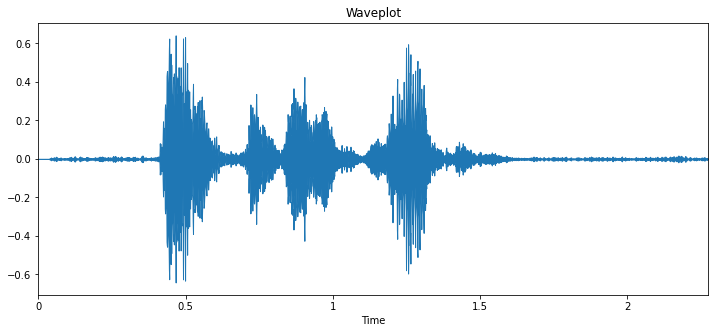

In [ ]:
#waveplot
plt.figure(figsize=(12, 5))
librosa.display.waveplot(y, sr=sr)
plt.title('Waveplot')
plt.show()

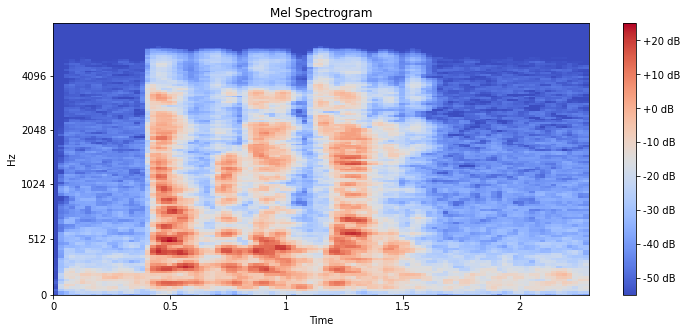

In [ ]:
# Plot log mel spectrogram
plt.figure(figsize=(12, 5))
spectrogram = librosa.feature.melspectrogram(y=y, sr=sr) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()

(20, 99)


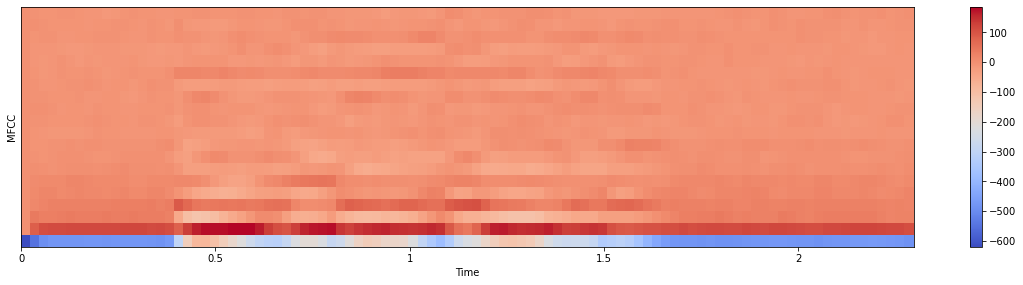

In [ ]:
# MFCC
mfcc = librosa.feature.mfcc(y=y, sr=sr)
print(mfcc.shape)
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

Text(0.5, 1.0, 'Emotion Countplot')

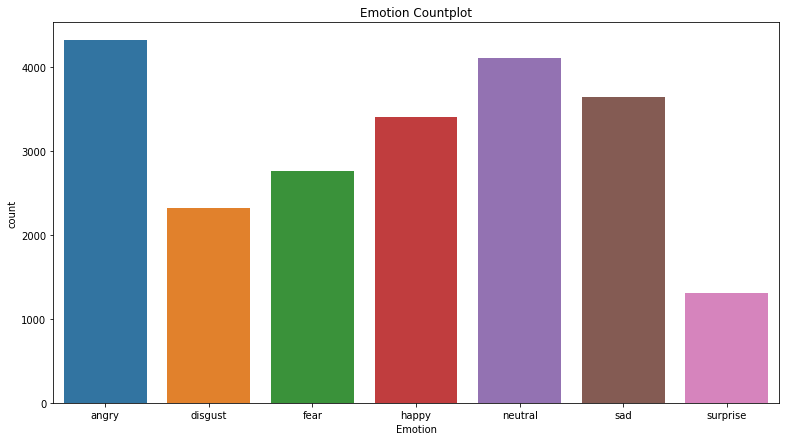

In [ ]:
plt.figure(figsize=(13,7))
sns.countplot(df_audio['Emotion'])
plt.title('Emotion Countplot')

Text(0.5, 1.0, 'Emotion Countplot for Male/Female')

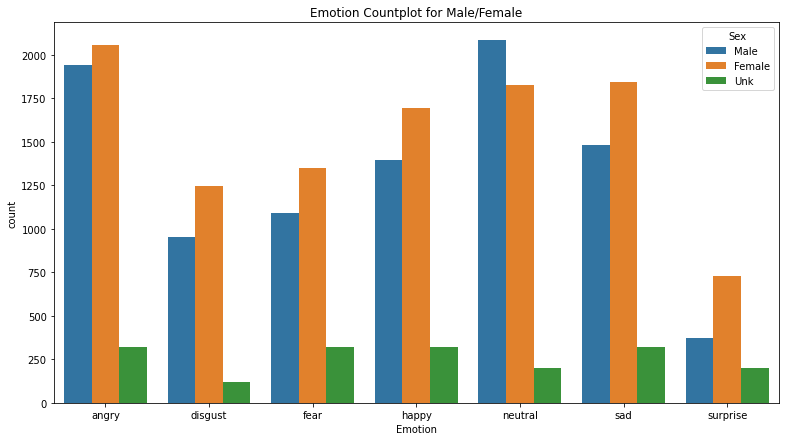

In [ ]:
plt.figure(figsize=(13,7))
sns.countplot(df_audio['Emotion'],hue=df_audio['Sex'])
plt.title('Emotion Countplot for Male/Female')

In [ ]:
# Checking the length of all files without loading them first 
def GetDuration(audio_file): 
  return round(librosa.get_duration(filename=audio_file),1)

df_audio['Duration'] = df_audio['Path'].apply(GetDuration)
df_audio.head()

,Unnamed: 0,Emotion,Source,Path,Sex,Duration
0,0,angry,CREMA,/content/drive/MyDrive/Colab Notebooks/almabet...,Male,2.3
1,1,disgust,CREMA,/content/drive/MyDrive/Colab Notebooks/almabet...,Male,2.3
2,2,fear,CREMA,/content/drive/MyDrive/Colab Notebooks/almabet...,Male,2.2
3,3,happy,CREMA,/content/drive/MyDrive/Colab Notebooks/almabet...,Male,1.9
4,4,neutral,CREMA,/content/drive/MyDrive/Colab Notebooks/almabet...,Male,2.0


Max Duration : 33.3 
 Min Duration : 0.4 
 Avg Duration : 2.967210641799231


Text(0.5, 1.0, 'Audio duration')

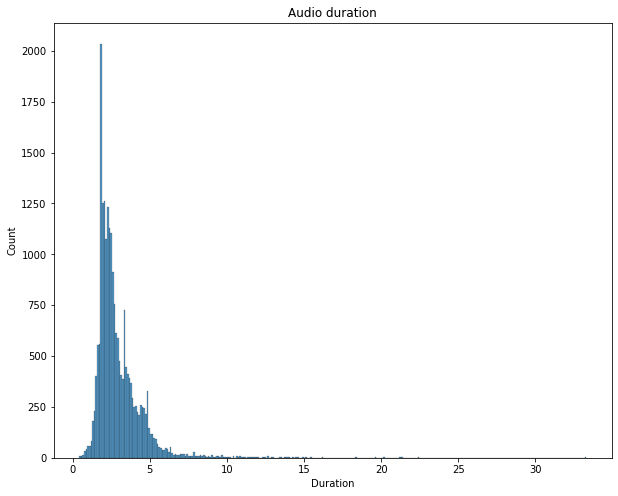

In [ ]:
print('Max Duration :', df_audio['Duration'].max(),'\n',
      'Min Duration :', df_audio['Duration'].min(),'\n',
      'Avg Duration :', df_audio['Duration'].mean())
plt.figure(figsize=(10,8))
sns.histplot(df_audio['Duration'])
plt.title('Audio duration')

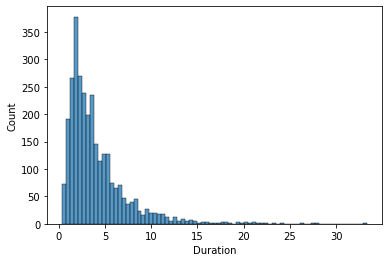

In [ ]:
sns.histplot(df_audio[df_audio['Source']=='SHEMO']['Duration'])

In [ ]:
df_audio[df_audio['Duration']>20]['Path'][15602]

'/content/drive/MyDrive/Colab Notebooks/almabetter pro materials/Capstone Projects/My Capstone Projects/SER/Data/SHEMO/female/F05N06.wav'

Max Duration : 7.1 
 Min Duration : 1.3 
 Avg Duration : 2.772931531805039


Text(0.5, 1.0, 'Audio duration')

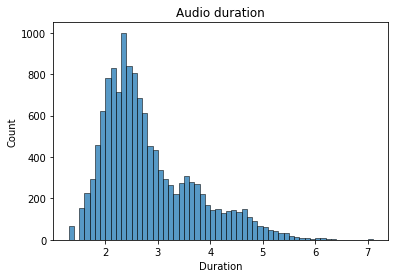

In [ ]:
print('Max Duration :', df_audio['Duration'].max(),'\n',
      'Min Duration :', df_audio['Duration'].min(),'\n',
      'Avg Duration :', df_audio['Duration'].mean())
sns.histplot(df_audio['Duration'])
plt.title('Audio duration')

Max Duration : 5.0 
 Min Duration : 1.3 
 Avg Duration : 2.541185165278134


Text(0.5, 1.0, 'Audio duration')

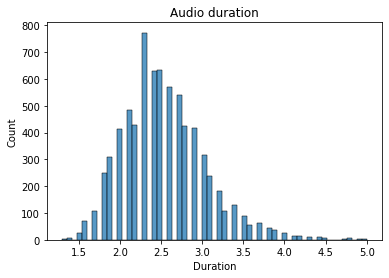

In [ ]:
print('Max Duration :', df['Duration'].max(),'\n',
      'Min Duration :', df['Duration'].min(),'\n',
      'Avg Duration :', df['Duration'].mean())
sns.histplot(df['Duration'])
plt.title('Audio duration')

# 3. Data Augmentation

In [ ]:
# Using 4 types of data augmentation techniques: Noise injection, Stretching, Shifting & Pitch altering
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)


In [ ]:
# taking any example and checking for techniques.
path = np.array(df_audio.Path)[1]
data, sample_rate = librosa.load(path)

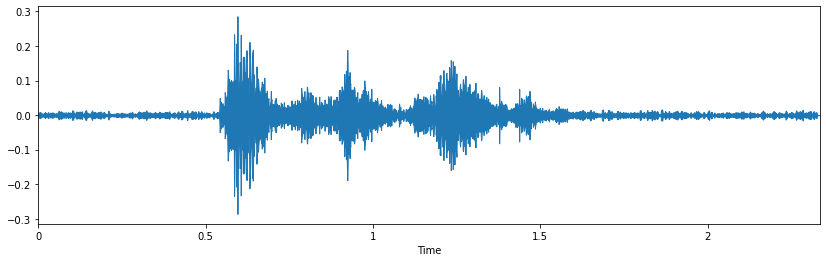

In [ ]:
# Original audio
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=data, sr=sample_rate)
Audio(path)

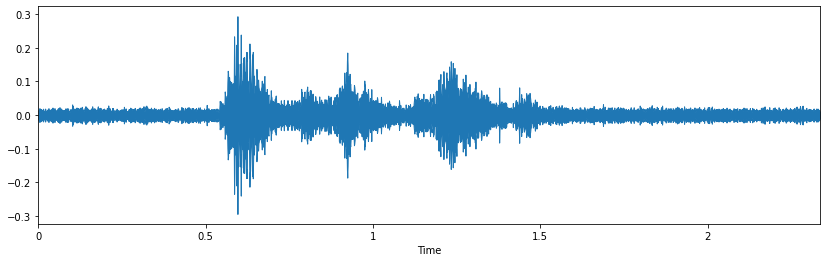

In [ ]:
# Data + noise
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

Adding noise will be a very useful technique to limit overfitting

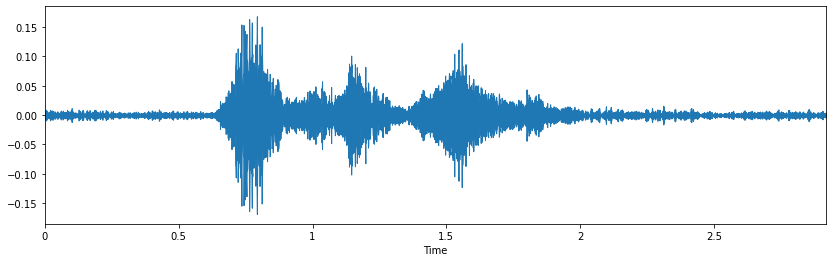

In [ ]:
# Stretching
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

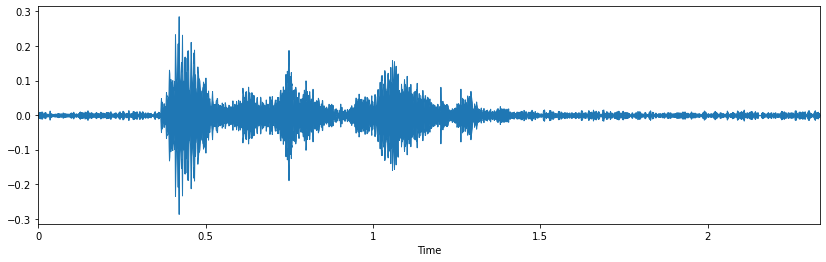

In [ ]:
# Shifting
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

We will use shifting so that model remains balanced with silence in data.
As we have audio files of multiple lengths, if a file duration is less than our sampling duration limit, there will be silence at the end.

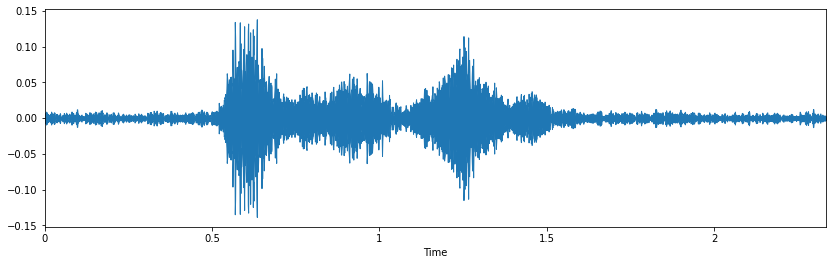

In [ ]:
# Altering Pitch
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

# 4. Feature extraction

In [ ]:
# Feature extraction
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching
    stretch_data = stretch(data,rate=0.8)
    res3 = extract_features(stretch_data)
    result = np.vstack((result, res3)) # stacking vertically
    
    #data with pitching
    pitch_data = pitch(data,sample_rate=sample_rate,pitch_factor=0.7)
    res4 = extract_features(pitch_data)
    result = np.vstack((result, res4)) # stacking vertically

    #data with pitching
    shift_data = shift(data)
    res5 = extract_features(shift_data)
    result = np.vstack((result, res5)) # stacking vertically
    
    return result

In [ ]:
#Taking all files with more than 1sec duration
df = df_audio[df_audio['Duration']>=1]

In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/almabetter pro materials/Capstone Projects/My Capstone Projects/SER/Data/df_csv')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/almabetter pro materials/Capstone Projects/My Capstone Projects/SER/Data/df_csv')

In [ ]:
X, Y = [], []
for path, emotion in zip(df.Path, df.Emotion):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 5 times as we have made 4 augmentation techniques on each audio file.
        Y.append(emotion)

In [ ]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.085128,0.671304,0.697488,0.676313,0.669976,0.669712,0.577660,0.577772,0.644556,0.652684,...,7.010265e-08,6.367364e-08,5.879250e-08,5.493106e-08,5.187794e-08,4.953031e-08,4.774142e-08,4.650686e-08,4.574143e-08,angry
1,0.301096,0.767976,0.784961,0.796174,0.815950,0.787785,0.650147,0.641022,0.709442,0.706582,...,7.764381e-03,7.685333e-03,7.347498e-03,7.775575e-03,7.380999e-03,7.470760e-03,7.706976e-03,7.426037e-03,7.398720e-03,angry
2,0.078132,0.718978,0.730493,0.655114,0.667761,0.688491,0.603927,0.578656,0.619608,0.682274,...,7.471603e-08,6.545476e-08,5.861531e-08,5.337429e-08,4.934708e-08,4.631045e-08,4.404930e-08,4.249528e-08,4.155338e-08,disgust
3,0.154186,0.788219,0.772132,0.742615,0.756318,0.792805,0.674418,0.623703,0.656872,0.701106,...,3.513486e-04,3.493765e-04,3.373523e-04,3.515146e-04,3.633365e-04,3.588460e-04,3.557605e-04,3.435369e-04,3.467868e-04,disgust
4,0.070830,0.577646,0.608404,0.630609,0.656565,0.616906,0.573222,0.554951,0.632575,0.668919,...,3.819887e-07,3.671185e-07,3.523840e-07,3.383461e-07,3.258731e-07,3.154927e-07,3.071447e-07,3.011664e-07,2.973325e-07,fear


In [ ]:
Features.to_csv('/content/drive/MyDrive/Colab Notebooks/almabetter pro materials/Capstone Projects/My Capstone Projects/SER/Processed Data/all_features.csv')

In [ ]:
df_features = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/almabetter pro materials/Capstone Projects/My Capstone Projects/SER/Processed Data/all_features.csv').drop(['Unnamed: 0'],axis=1)

In [ ]:
print(df_features.shape)
df_features.head()

(88655, 163)


,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.085128,0.671304,0.697488,0.676313,0.669976,0.669712,0.577660,0.577772,0.644556,0.652684,...,7.010265e-08,6.367364e-08,5.879250e-08,5.493106e-08,5.187794e-08,4.953031e-08,4.774142e-08,4.650686e-08,4.574143e-08,angry
1,0.213218,0.763132,0.742426,0.752173,0.752574,0.781251,0.660041,0.604611,0.677656,0.681481,...,1.126257e-03,1.095427e-03,1.055565e-03,1.080432e-03,1.030470e-03,1.054767e-03,1.053113e-03,1.062876e-03,1.037401e-03,angry
2,0.090380,0.642265,0.659882,0.642870,0.657842,0.675209,0.589269,0.585186,0.663116,0.657933,...,6.214868e-08,5.642176e-08,5.207529e-08,4.863734e-08,4.592026e-08,4.383129e-08,4.223961e-08,4.114190e-08,4.046130e-08,angry
3,0.092131,0.691713,0.681322,0.678921,0.723097,0.736819,0.590404,0.561477,0.647856,0.662994,...,9.408230e-08,8.467825e-08,7.856777e-08,7.413299e-08,7.159165e-08,7.392430e-08,9.438271e-08,1.483596e-07,1.929075e-07,angry
4,0.085322,0.686763,0.686174,0.676917,0.665352,0.686558,0.585954,0.567559,0.632389,0.650475,...,8.456488e-08,7.829060e-08,7.353919e-08,6.977081e-08,6.678730e-08,6.449962e-08,6.275225e-08,6.155172e-08,6.079908e-08,angry


# 5.0 Data Preparation for MLP Classifier
As of now we have extracted the data, now we need split our data for training and testing.

In [ ]:
X = df_features.iloc[: ,:-1].values
Y = df_features['labels'].values

In [ ]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.12, random_state=1, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((78016, 162), (78016,), (10639, 162), (10639,))

# 5.1 MLP Classifier


In [ ]:
# Creating MLP Classifier
model = MLPClassifier(alpha = 0.01, batch_size = 256, epsilon = 1e-08, hidden_layer_sizes = (256,128,128,64),solver='adam', learning_rate = 'adaptive', max_iter = 200)

In [ ]:
# Training on data
model.fit(x_train, y_train)

MLPClassifier(alpha=0.01, batch_size=256,
              hidden_layer_sizes=(256, 128, 128, 64), learning_rate='adaptive')

In [ ]:
# Prediction
y_pred_train = model.predict(x_train)
y_pred = model.predict(x_test)

In [ ]:
# Accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy = accuracy_score(y_test, y_pred)
print("Train set Accuracy: {:.2f}%".format(accuracy_train*100))
print("Test set Accuracy: {:.2f}%".format(accuracy*100))

Train set Accuracy: 91.84%
Test set Accuracy: 81.69%


In [ ]:
# Storing accuracy
df_acc = pd.DataFrame(index=['Train Accuracy','Test Accuracy'])
df_acc['MLP Classifer'] = accuracy_train,accuracy
df_acc

,MLP Classifer
Train Accuracy,0.918414
Test Accuracy,0.816900


In [ ]:
# Storing predictions
df_res = pd.DataFrame(columns=['Actual Labels','MLP Pred'])
df_res['MLP Pred'] = y_pred.flatten()
df_res['Actual Labels'] = y_test.flatten()

df_res.head(10)

,Actual Labels,MLP Pred
0,neutral,happy
1,angry,angry
2,neutral,neutral
3,neutral,neutral
4,sad,disgust
5,neutral,neutral
6,fear,fear
7,happy,happy
8,sad,sad
9,sad,sad


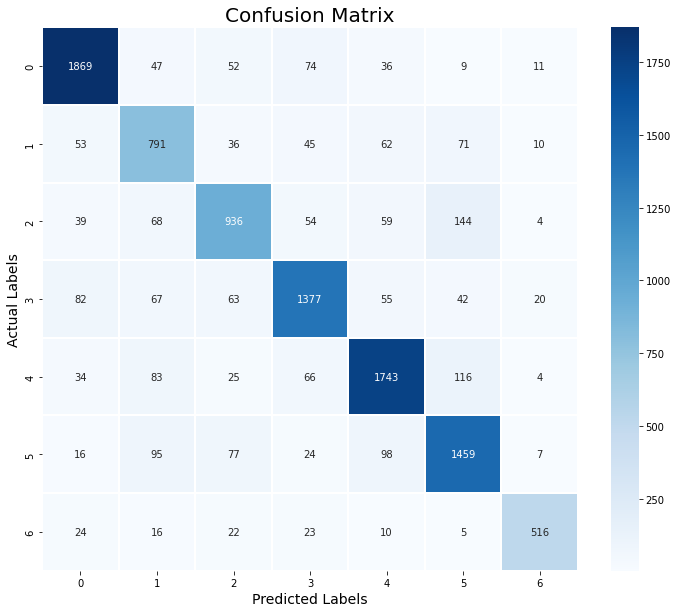

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm)
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.88      0.89      0.89      2098
     disgust       0.68      0.74      0.71      1068
        fear       0.77      0.72      0.74      1304
       happy       0.83      0.81      0.82      1706
     neutral       0.84      0.84      0.84      2071
         sad       0.79      0.82      0.81      1776
    surprise       0.90      0.84      0.87       616

    accuracy                           0.82     10639
   macro avg       0.81      0.81      0.81     10639
weighted avg       0.82      0.82      0.82     10639



In [ ]:
# Saving the model
filename = '/content/drive/MyDrive/Colab Notebooks/almabetter pro materials/Capstone Projects/My Capstone Projects/SER/Model/model_mlpclassifier.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# load the model from disk
model = pickle.load(open(filename, 'rb'))

# 6.0 Data Preparation for 1-d CNN & LSMT
As of now we have extracted the data, now we need to normalize and split our data for training and testing.

In [ ]:
X = df_features.iloc[: ,:-1].values
Y = df_features['labels'].values

In [ ]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.12, random_state=1, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((78016, 162), (78016, 7), (10639, 162), (10639, 7))

In [ ]:
y_train.sum(axis=0)*100/y_train.sum()

array([19.41524815, 10.30814192, 12.65894176, 16.05952625, 19.21913454,
       16.67478466,  5.66422272])

In [ ]:
y_test.sum(axis=0)*100/y_test.sum()

array([19.71989849, 10.03853746, 12.25679105, 16.03534167, 19.46611524,
       16.69329824,  5.79001786])

In [ ]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((78016, 162), (78016, 7), (10639, 162), (10639, 7))

In [ ]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((78016, 162, 1), (78016, 7), (10639, 162, 1), (10639, 7))

# 6.1 CNN

In [ ]:
# Creating model
model = Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu',input_shape=(x_train.shape[1], 1)))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.4))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.4))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
#model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(7,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 162, 256)          1536      
                                                                 
 conv1d_1 (Conv1D)           (None, 162, 256)          327936    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 81, 256)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 81, 256)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 81, 128)           163968    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 41, 128)          0         
 1D)                                                    

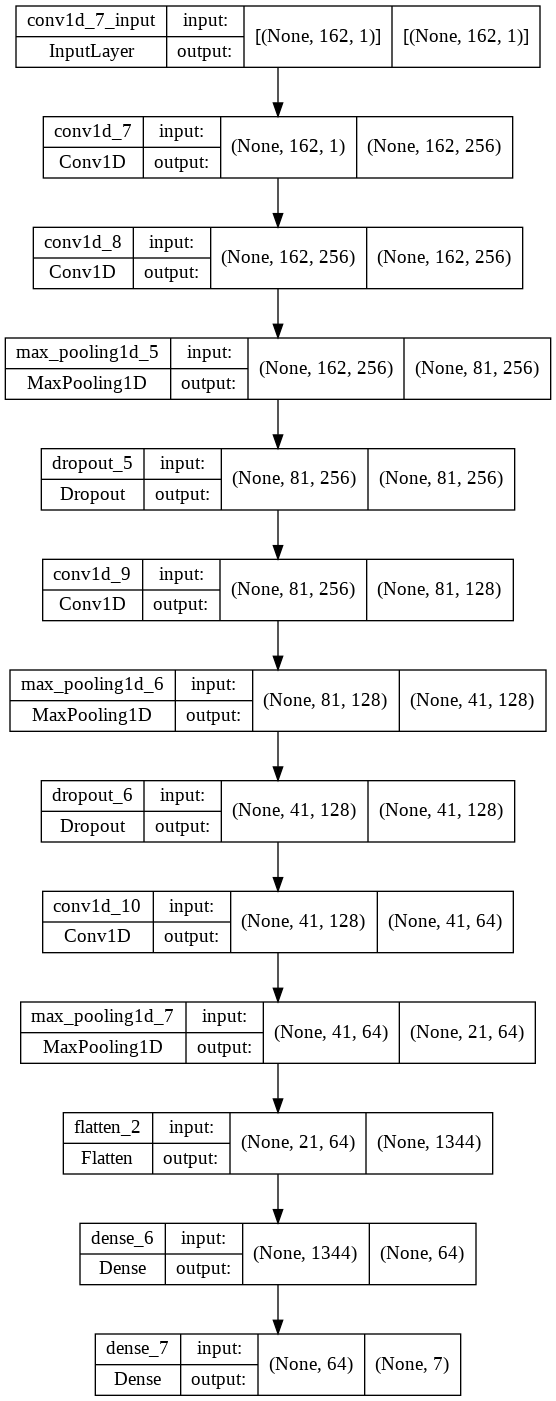

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Training
history=model.fit(x_train, y_train, batch_size=256, epochs=200, validation_data=(x_test, y_test))

Epoch 1/200
305/305 [==============================] - 38s 83ms/step - loss: 1.5350 - accuracy: 0.4029 - val_loss: 1.3845 - val_accuracy: 0.4820
Epoch 2/200
305/305 [==============================] - 25s 83ms/step - loss: 1.3112 - accuracy: 0.5006 - val_loss: 1.1922 - val_accuracy: 0.5509
Epoch 3/200
305/305 [==============================] - 25s 82ms/step - loss: 1.1955 - accuracy: 0.5447 - val_loss: 1.1038 - val_accuracy: 0.5929
Epoch 4/200
305/305 [==============================] - 26s 84ms/step - loss: 1.1140 - accuracy: 0.5741 - val_loss: 1.0253 - val_accuracy: 0.6179
Epoch 5/200
305/305 [==============================] - 25s 82ms/step - loss: 1.0527 - accuracy: 0.5998 - val_loss: 0.9782 - val_accuracy: 0.6342
Epoch 6/200
305/305 [==============================] - 25s 82ms/step - loss: 1.0063 - accuracy: 0.6183 - val_loss: 0.9529 - val_accuracy: 0.6518
Epoch 7/200
305/305 [==============================] - 25s 82ms/step - loss: 0.9606 - accuracy: 0.6319 - val_loss: 0.8947 - val_ac

333/333 [==============================] - 3s 10ms/step - loss: 0.3799 - accuracy: 0.8687
Accuracy of our model on test data :  86.86906695365906 %


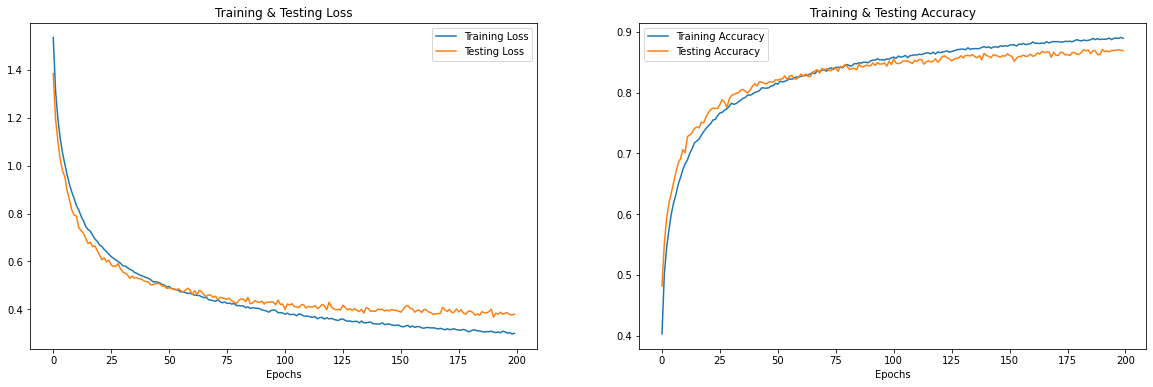

In [ ]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(200)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
# predicting on train data.
pred_train = model.predict(x_train)
y_pred_train = encoder.inverse_transform(pred_train)

y_train = encoder.inverse_transform(y_train)

In [ ]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

In [ ]:
df_res['CNN Pred'] = y_pred.flatten()
df_res.head(10)

,Actual Labels,MLP Pred,CNN Pred
0,neutral,happy,neutral
1,angry,angry,angry
2,neutral,neutral,neutral
3,neutral,neutral,neutral
4,sad,disgust,neutral
5,neutral,neutral,neutral
6,fear,fear,fear
7,happy,happy,happy
8,sad,sad,sad
9,sad,sad,sad


In [ ]:
# Storing accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy = accuracy_score(y_test, y_pred)
print("Train set Accuracy: {:.2f}%".format(accuracy_train*100))
print("Test set Accuracy: {:.2f}%".format(accuracy*100))
df_acc['CNN'] = accuracy_train,accuracy
df_acc

Train set Accuracy: 95.37%
Test set Accuracy: 86.15%


,MLP Classifer,CNN
Train Accuracy,0.918414,0.953702
Test Accuracy,0.816900,0.861453


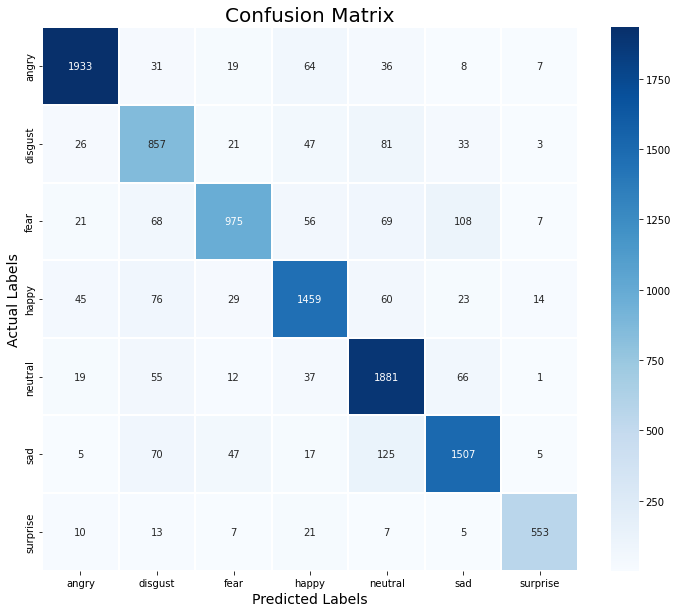

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.94      0.92      0.93      2098
     disgust       0.73      0.80      0.77      1068
        fear       0.88      0.75      0.81      1304
       happy       0.86      0.86      0.86      1706
     neutral       0.83      0.91      0.87      2071
         sad       0.86      0.85      0.85      1776
    surprise       0.94      0.90      0.92       616

    accuracy                           0.86     10639
   macro avg       0.86      0.85      0.86     10639
weighted avg       0.86      0.86      0.86     10639



In [ ]:
# Saving the model
path = '/content/drive/MyDrive/Colab Notebooks/almabetter pro materials/Capstone Projects/My Capstone Projects/SER/Model/model_cnn.h5' 
model.save(path) 

In [ ]:
model = load_model(path)

# 6.2 LSTM

In [ ]:
model = Sequential()
model.add(LSTM(256, return_sequences=False, input_shape=(x_train.shape[1], 1)))

#model.add(Dense(256,activation='relu'))
#model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
#model.add(Dense(32,activation='relu'))
model.add(Dense(7,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dense_1 (Dense)             (None, 7)                 455       
                                                                 
Total params: 281,095
Trainable params: 281,095
Non-trainable params: 0
_________________________________________________________________


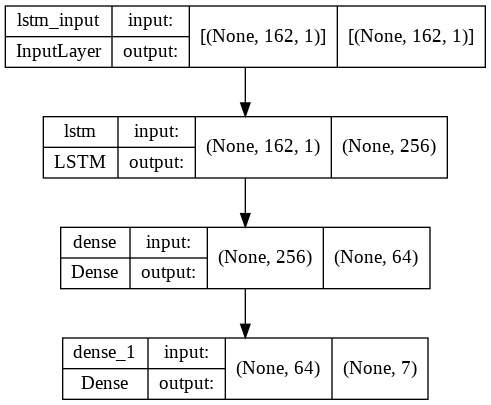

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
history=model.fit(x_train, y_train, batch_size=256, epochs=200, validation_data=(x_test, y_test))

Epoch 1/200
305/305 [==============================] - 14s 41ms/step - loss: 1.8054 - accuracy: 0.2723 - val_loss: 1.7162 - val_accuracy: 0.2975
Epoch 2/200
305/305 [==============================] - 12s 39ms/step - loss: 1.7227 - accuracy: 0.3109 - val_loss: 1.6652 - val_accuracy: 0.3464
Epoch 3/200
305/305 [==============================] - 12s 39ms/step - loss: 1.6823 - accuracy: 0.3345 - val_loss: 1.6427 - val_accuracy: 0.3731
Epoch 4/200
305/305 [==============================] - 12s 39ms/step - loss: 1.6455 - accuracy: 0.3483 - val_loss: 1.5979 - val_accuracy: 0.3694
Epoch 5/200
305/305 [==============================] - 12s 40ms/step - loss: 1.6136 - accuracy: 0.3638 - val_loss: 1.5892 - val_accuracy: 0.3818
Epoch 6/200
305/305 [==============================] - 12s 39ms/step - loss: 1.5746 - accuracy: 0.3839 - val_loss: 1.5504 - val_accuracy: 0.3961
Epoch 7/200
305/305 [==============================] - 12s 39ms/step - loss: 1.5400 - accuracy: 0.3974 - val_loss: 1.4961 - val_ac

333/333 [==============================] - 2s 6ms/step - loss: 1.1171 - accuracy: 0.8044
Accuracy of our model on test data :  80.43988943099976 %


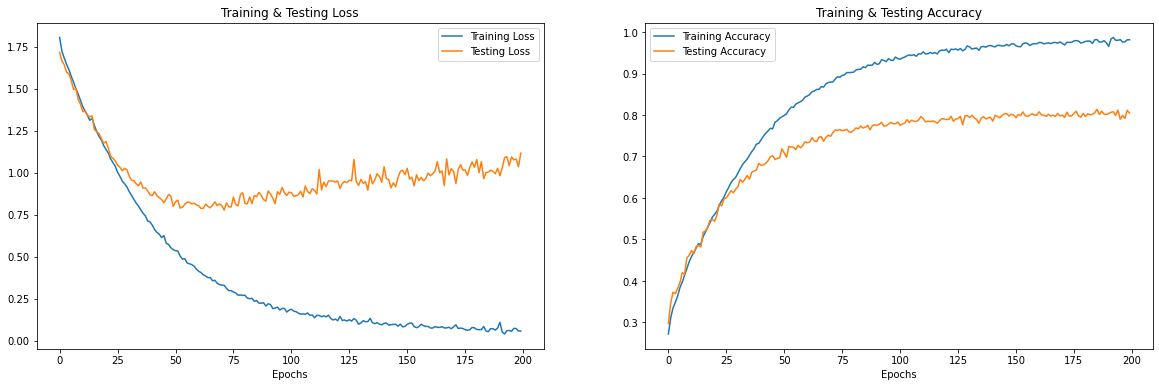

In [ ]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(200)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
# predicting on train data.
pred_train = model.predict(x_train)
y_pred_train = encoder.inverse_transform(pred_train)

y_train = encoder.inverse_transform(y_train)

In [ ]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

In [ ]:
df_res['LSTM Pred'] = y_pred.flatten()
df_res.head(10)

,Actual Labels,MLP Pred,CNN Pred,LSTM Pred
0,neutral,happy,neutral,neutral
1,angry,angry,angry,angry
2,neutral,neutral,neutral,neutral
3,neutral,neutral,neutral,neutral
4,sad,disgust,neutral,neutral
5,neutral,neutral,neutral,neutral
6,fear,fear,fear,fear
7,happy,happy,happy,happy
8,sad,sad,sad,sad
9,sad,sad,sad,sad


In [ ]:
# Storing accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy = accuracy_score(y_test, y_pred)
print("Train set Accuracy: {:.2f}%".format(accuracy_train*100))
print("Test set Accuracy: {:.2f}%".format(accuracy*100))
df_acc['LSTM'] = accuracy_train,accuracy
df_acc

Train set Accuracy: 98.40%
Test set Accuracy: 80.44%


,MLP Classifer,CNN,LSTM
Train Accuracy,0.918414,0.953702,0.984042
Test Accuracy,0.816900,0.861453,0.804399


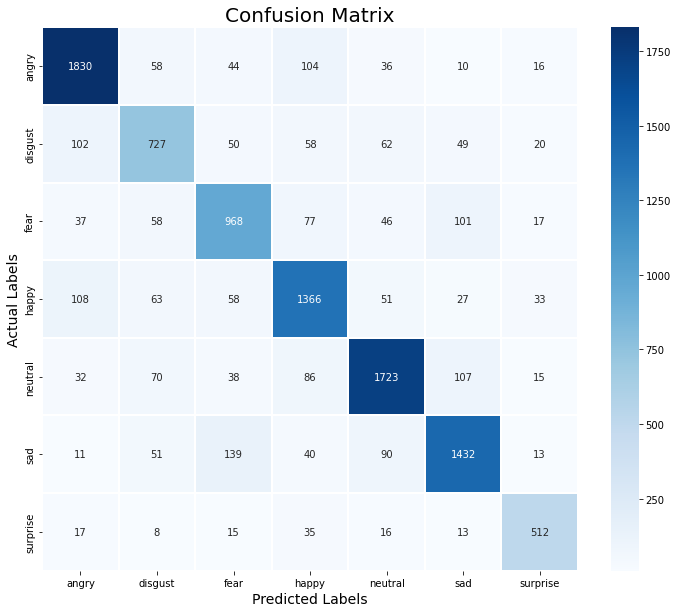

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.86      0.87      0.86      2098
     disgust       0.70      0.68      0.69      1068
        fear       0.74      0.74      0.74      1304
       happy       0.77      0.80      0.79      1706
     neutral       0.85      0.83      0.84      2071
         sad       0.82      0.81      0.81      1776
    surprise       0.82      0.83      0.82       616

    accuracy                           0.80     10639
   macro avg       0.79      0.80      0.79     10639
weighted avg       0.80      0.80      0.80     10639



In [ ]:
# Saving the model
path = '/content/drive/MyDrive/Colab Notebooks/almabetter pro materials/Capstone Projects/My Capstone Projects/SER/Model/model_lstm.h5' 
model.save(path) 

In [ ]:
model = load_model(path)

# 6.3 LSTM + CNN

In [ ]:
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.4))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.4))

#model.add(Conv1D(32, kernel_size=5, strides=1, padding='same', activation='relu'))
#model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
#model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(7,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 162, 256)          264192    
                                                                 
 conv1d_13 (Conv1D)          (None, 162, 128)          163968    
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 81, 128)          0         
 g1D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 81, 128)           0         
                                                                 
 conv1d_14 (Conv1D)          (None, 81, 64)            41024     
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 41, 64)           0         
 g1D)                                                 

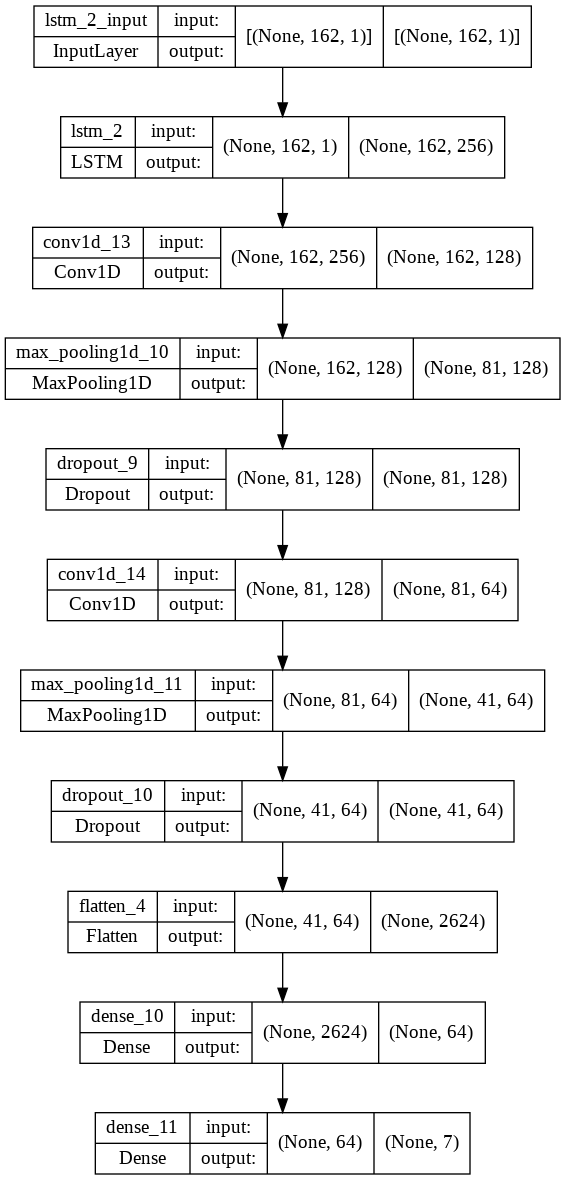

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
history=model.fit(x_train, y_train, batch_size=256, epochs=200, validation_data=(x_test, y_test))

Epoch 1/200
305/305 [==============================] - 31s 59ms/step - loss: 1.5242 - accuracy: 0.4002 - val_loss: 1.3321 - val_accuracy: 0.4914
Epoch 2/200
305/305 [==============================] - 18s 59ms/step - loss: 1.3109 - accuracy: 0.4933 - val_loss: 1.2175 - val_accuracy: 0.5330
Epoch 3/200
305/305 [==============================] - 18s 60ms/step - loss: 1.2214 - accuracy: 0.5277 - val_loss: 1.1521 - val_accuracy: 0.5648
Epoch 4/200
305/305 [==============================] - 18s 60ms/step - loss: 1.1509 - accuracy: 0.5552 - val_loss: 1.0657 - val_accuracy: 0.5970
Epoch 5/200
305/305 [==============================] - 19s 62ms/step - loss: 1.1021 - accuracy: 0.5756 - val_loss: 1.0029 - val_accuracy: 0.6234
Epoch 6/200
305/305 [==============================] - 19s 61ms/step - loss: 1.0542 - accuracy: 0.5951 - val_loss: 0.9921 - val_accuracy: 0.6258
Epoch 7/200
305/305 [==============================] - 18s 59ms/step - loss: 1.0181 - accuracy: 0.6073 - val_loss: 0.9365 - val_ac

333/333 [==============================] - 2s 6ms/step - loss: 0.5781 - accuracy: 0.8773
Accuracy of our model on test data :  87.73381114006042 %


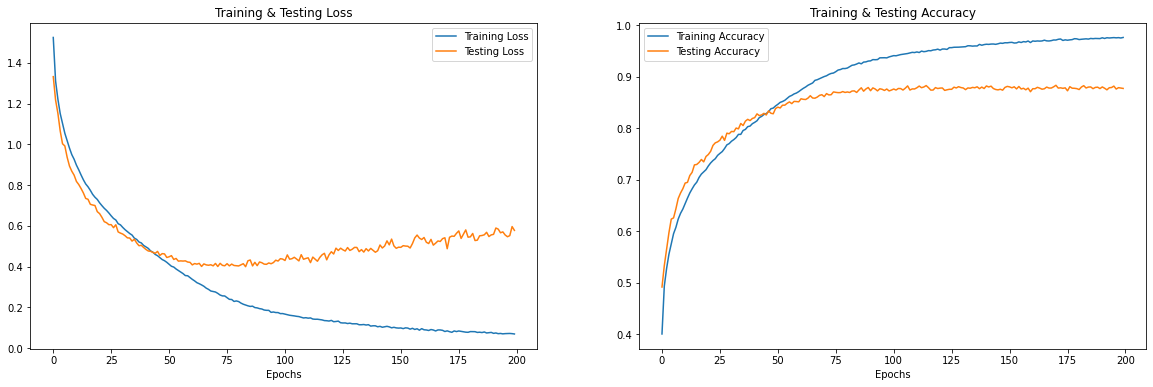

In [ ]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(200)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
# predicting on train data.
pred_train = model.predict(x_train)
y_pred_train = encoder.inverse_transform(pred_train)

y_train = encoder.inverse_transform(y_train)

In [ ]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

In [ ]:
df_res['LSTM_CNN Pred'] = y_pred.flatten()
df_res.head(10)

,Actual Labels,MLP Pred,CNN Pred,LSTM Pred,LSTM_CNN Pred
0,neutral,happy,neutral,neutral,neutral
1,angry,angry,angry,angry,angry
2,neutral,neutral,neutral,neutral,neutral
3,neutral,neutral,neutral,neutral,neutral
4,sad,disgust,neutral,neutral,sad
5,neutral,neutral,neutral,neutral,neutral
6,fear,fear,fear,fear,fear
7,happy,happy,happy,happy,happy
8,sad,sad,sad,sad,sad
9,sad,sad,sad,sad,sad


In [ ]:
# Storing accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy = accuracy_score(y_test, y_pred)
print("Train set Accuracy: {:.2f}%".format(accuracy_train*100))
print("Test set Accuracy: {:.2f}%".format(accuracy*100))
df_acc['LSTM_CNN'] = accuracy_train,accuracy
df_acc

Train set Accuracy: 99.68%
Test set Accuracy: 87.73%


,MLP Classifer,CNN,LSTM,LSTM_CNN
Train Accuracy,0.918414,0.953702,0.984042,0.996757
Test Accuracy,0.816900,0.861453,0.804399,0.877338


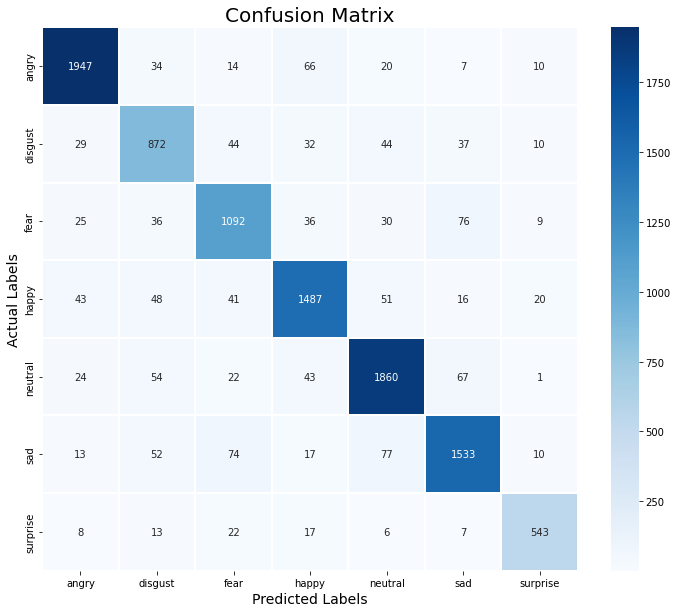

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.93      0.93      0.93      2098
     disgust       0.79      0.82      0.80      1068
        fear       0.83      0.84      0.84      1304
       happy       0.88      0.87      0.87      1706
     neutral       0.89      0.90      0.89      2071
         sad       0.88      0.86      0.87      1776
    surprise       0.90      0.88      0.89       616

    accuracy                           0.88     10639
   macro avg       0.87      0.87      0.87     10639
weighted avg       0.88      0.88      0.88     10639



In [ ]:
# Saving the model
path = '/content/drive/MyDrive/Colab Notebooks/almabetter pro materials/Capstone Projects/My Capstone Projects/SER/Model/model_lstm_cnn.h5' 
model.save(path) 

In [ ]:
model = load_model(path)

# 7 Model selection

In [ ]:
# Comparing  accuracy of all models
df_acc

,MLP Classifer,CNN,LSTM,LSTM_CNN
Train Accuracy,0.918414,0.953702,0.984042,0.996757
Test Accuracy,0.816900,0.861453,0.804399,0.877338


In [ ]:
# Predictions of all models on Test set
df_res.head(10)

,Actual Labels,MLP Pred,CNN Pred,LSTM Pred,LSTM_CNN Pred
0,neutral,happy,neutral,neutral,neutral
1,angry,angry,angry,angry,angry
2,neutral,neutral,neutral,neutral,neutral
3,neutral,neutral,neutral,neutral,neutral
4,sad,disgust,neutral,neutral,sad
5,neutral,neutral,neutral,neutral,neutral
6,fear,fear,fear,fear,fear
7,happy,happy,happy,happy,happy
8,sad,sad,sad,sad,sad
9,sad,sad,sad,sad,sad


Selecting LSTM+CNN model as the winner !!!

# Testing on an audio file

In [ ]:
# Loading recorded audio file and extracting features 
path_file = '/content/drive/MyDrive/Colab Notebooks/almabetter pro materials/Capstone Projects/My Capstone Projects/SER/test audio files/Recording_25.mp3'
data, sample_rate = librosa.load(path_file, duration=2.5, offset=0.6)
fea = np.array(extract_features(data))
fea = fea.reshape((-1,162))
fea = np.expand_dims(fea, axis=2)
fea.shape

(1, 162, 1)

In [ ]:
# Predicting using LSTM+CNN model
model_path = '/content/drive/MyDrive/Colab Notebooks/almabetter pro materials/Capstone Projects/My Capstone Projects/SER/Model/model_lstm_cnn.h5'
model = load_model(model_path)
pred = model.predict(fea)

In [ ]:
# Printing predicted emotion
list_pred = pred.tolist()
emotion_list = ['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']
emotion_dict = dict(zip(emotion_list,list_pred[0]))
for emotion,pred in emotion_dict.items():
  max_pred = max(list_pred[0])
  if pred==max_pred:
    print(emotion)

Fear


# Summary/Conclusion

Thats it folks!!! We have reached to the end of this exercise.
This little venture can be summarised as below:

*   Gather wide range of properly labelled speech recordings in different languages and accent to make sure model generalizes well on real world data.
*   Selecting best number of emotions to be classified. Selected emotions are Happy, Sad, Angry, Surprise, Disgust, Fear, Neutral.
*   Augmenting Data to generate more data. Techniques used are Noise Insertion, Shifting, Stretching and changing Pitch.
*   Extract all important audio features that can be learned by model.
*   Trying different neural network models like MLP Classifier, 1-d CNN network, LSTM, LSTM+CNN combination & selecting best model.
*   Keeping a check on overfitting while training model by using techniques such as Dropout.
*   Dockerizing and creating application using Streamlit.
*   Deploying application using Azure web-apps services.

Experiments:
1.   MLP Classifier performed well on the data with 91% and 81% accuracy on Train/Test sets resp. Handeling overfitting is a challenge for a ANN network. 
2.   CNN model with around 6L parameters resulted in accuracy of 95%/86% on train/test sets. Maxpool layer and dropout is utilised in training.
3.   LSTM model with over 2.8L parameters resulted in accuracy of 98%/80% on train/test set showing overfitting.
4.   A combination of LSTM and CNN helped reducing overfitting and resulted in 99%/88% train/test accuracy. Hence, I have selected this model for deployment.


*   All models performed poorly on Disgust & Fear emotion as compared to other emotions.
*   Using multiple datasets of different properties like gender, language, accent, recording environment is essential in getting a more generalized model.
* Data Augmentation techniques proved to be useful in improving model performance.  




